In [ ]:
#!pip install imblearn
#!pip install pyLDAvis --user

# **Advanced Programming VU -- Project 2 - Natural Language Processing**

## **Introduction**

The project encompasses two primary areas of focus: text classification and topic modeling. For the classification task main focus is on two problem statements genre prediction and predefined topics prediction from lyrics and varying supporting input features. For the topic modeling task focus is to extract topics or themes from text using LDA and find their correlation with predefined topics in the music lyric’s dataset. For the classification task we have built three machine learning models including Logistic Regression, Naive Bayes and Random Forest classifier. I train the models on train data and evaluate their performance on test dataset. 

The Music lyrics dataset was obtained from Kaggle . The dataset entails song’s lyrics from 1950 to 2019. Song’s lyrics collection is from more than 5000 different artists. Dataset have total 30 attributes having lyrics attribute, artist names, release date, genre, topic and other meta information about the dataset. In this project, our problem statement focused on these five attributes. All the lyrics in the dataset are in English language. Dataset have total 28372 different song lyrics.

In [1]:
import kaggle

In [1]:
import os

In [3]:
%cd data

C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic2_NLP\data


In [5]:
%mkdir Music_Dataset_1950_2019

In [4]:
%cd Music_Dataset_1950_2019

C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic2_NLP\data\Music_Dataset_1950_2019


In [9]:
current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: C:\Users\Jakob\Desktop\SoSe 2023\VU Advanced Programming Techniques\Portfolio\14hinum\Topic2_NLP\data\Music_Dataset_1950_2019


In [8]:
!kaggle datasets download -d saurabhshahane/music-dataset-1950-to-2019


  0%|          | 0.00/9.73M [00:00<?, ?B/s]
 10%|#         | 1.00M/9.73M [00:00<00:06, 1.46MB/s]
 31%|###       | 3.00M/9.73M [00:00<00:01, 3.72MB/s]
 51%|#####1    | 5.00M/9.73M [00:01<00:00, 6.19MB/s]
 72%|#######1  | 7.00M/9.73M [00:01<00:00, 7.02MB/s]
 92%|#########2| 9.00M/9.73M [00:01<00:00, 7.75MB/s]
100%|##########| 9.73M/9.73M [00:01<00:00, 6.19MB/s]


## **Import of packages**

In [5]:
import sys
import csv
import nltk
# Importing pandas library
import pandas as pd
# Downloading the stopwords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import re
import tqdm
import spacy
import string
import warnings
import numpy as np
import pandas as pd

# Gensim
import gensim
import warnings
from gensim import models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# import sklearn libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jakob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Read data**

In [6]:
data = pd.read_csv("tcc_ceds_music.csv", index_col=0)

### **Displaying first 5 rows of the dataset**

In [7]:
data.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


### **Checking the shape of the dataset**

In [8]:
data.shape

(28372, 30)

### **Checking for missing values in the dataset**

In [9]:
data.isna().sum()

artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

### **Dropping missing values**

In [10]:
# Drop null rows and reset index
data = data.dropna().reset_index(drop=True)
data.shape

(28372, 30)

### **Checking the 1 lyrics in the dataset**

In [11]:
data["lyrics"][0]

'hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel'

## **Data Pre-processing**

To work on the dataset, apply machine learning models and to perform the analysis I have read complete dataset, extracted text and applied pre-processing. In text pre-processing phase, I have performed following steps:

### **Defining the text cleaning function**

To analyze the dataset, I have explored the dataset for null values and any irrelevant data attributes. I do not find any null instances but there are a lot of tabs, punctuations etc. in the dataset. To increase data interpretability, make it more reliable and decrease computational cost I have removed all punctuation marks, numeric values, special characters, tokens having length 1, and lowercase text to get homogenized data and remove more than one extra space.

This code defines a text_clean function to preprocess and clean text data. Here's a brief explanation of the function:

- **Remove punctuation:** Create a translator using the str.maketrans method and use it to replace all punctuation characters in the text with spaces.
- **Remove numeric values and single characters:** Use regular expressions to remove all numeric values and single characters (including accented characters) from the text.
- **Clean up:** Convert the text to lowercase, remove extra spaces, and trim leading/trailing whitespace.

The text_clean function is designed to process text data by removing various patterns, punctuation, numeric values, and single characters, as well as converting the text to lowercase and cleaning up extra spaces.





In [12]:
def text_clean(text):
    
    # Remove punctuations
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)
    
    # Remove numeric values
    text = re.sub('[0-9]', ' ', text)
    
    # Remove special characters and single characters
    text = re.sub(r"\b[A-Za-zÀÃ-ž]\b",' ', text)
    
    # Lowercase text and remove extra spaces
    text = re.sub('\s+',' ',text).lower().strip()
    
    return text


### **Defining the text tokenizing function**
- The text_tokenize function tokenizes the input text by splitting it into words
- Removes any words that are present in the stop_words list, returning the cleaned text as a single string.

In [13]:
def text_tokenize(text):
    
    # Tokenize text and remove stop words
    return " ".join([word for word in text.split() if word not in stop_words])

In [14]:
text_tokenize(data['lyrics'][0])

'hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel'

In the next step, I tokenized all text using nltk standard tokenizer and remove stopwords (e.g. the, is etc.) as these words do not provide any specific information.

### **Defining the lemmatization function**
- The code loads a small Spacy English model (en_core_web_sm) with the parser and named entity recognition (NER) components disabled.
- The lemmatize_text function takes a text input, processes it with the Spacy model to perform lemmatization
- Removes single characters, and cleans up extra spaces.

In [15]:
# Loading the spacy model
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def lemmatize_text(text):
    
    # Create a Doc object by processing the input text with the spacy model
    doc = nlp(text)
    
    # Perform lemmatization on the text and join the lemmas with spaces
    text = " ".join([items.lemma_ for items in doc])
   
    # Remove single-character words (excluding numbers and special characters)
    text = re.sub(r"\b[A-Za-zÀÃ-ž]\b",' ', text)
    
    # Remove extra spaces and trim leading/trailing spaces
    text = re.sub('\s+',' ',text).strip()
    
    return text


This step is also part of a text processing pipeline that performs lemmatization, a process that converts words to their base or root form, known as "lemmas". This process helps in reducing the dimensionality of the data and consolidating different forms of a word into a single entity for better text analysis.

### **Checking the text column**

In [16]:
data['lyrics']

0        hold time feel break feel untrue convince spea...
1        believe drop rain fall grow believe darkest ni...
2        sweetheart send letter goodbye secret feel bet...
3        kiss lips want stroll charm mambo chacha merin...
4        till darling till matter know till dream live ...
                               ...                        
28367    cause fuck leave scar tick tock clock come kno...
28368    minks things chain ring braclets yap fame come...
28369    get ban get ban stick crack relax plan attack ...
28370    check check yeah yeah hear thing call switch g...
28371    remix killer alive remix thriller trap bitch s...
Name: lyrics, Length: 28372, dtype: object

### **Applying text cleaning, lemmatization and tokenizing functions on text column**

In [17]:
# apply text clean function on text
data['text'] = data.lyrics.apply(text_clean)
# apply text tokenize function on text
data['text'] = data.text.apply(text_tokenize)
# apply text lemmatize function on text
data['text'] = data.text.apply(lemmatize_text)


### **Checking the text column after pre-processing**

In [18]:
data['text']

0        hold time feel break feel untrue convince spea...
1        believe drop rain fall grow believe darkest ni...
2        sweetheart send letter goodbye secret feel wel...
3        kiss lip want stroll charm mambo chacha mering...
4        till darling till matter know till dream live ...
                               ...                        
28367    cause fuck leave scar tick tock clock come kno...
28368    mink thing chain ring braclet yap fame come fo...
28369    get ban get ban stick crack relax plan attack ...
28370    check check yeah yeah hear thing call switch g...
28371    remix killer alive remix thriller trap bitch s...
Name: text, Length: 28372, dtype: object

In [19]:
data['text'][0]

'hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel'

# **Exploratory Data Analysis**

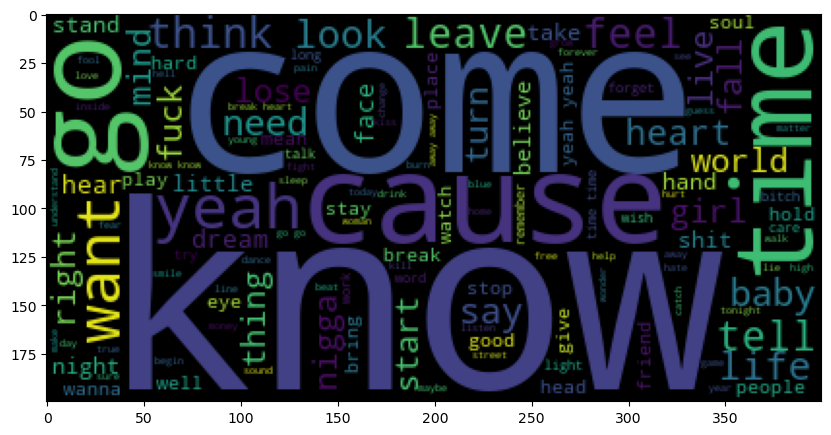

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
plt.figure(figsize=(10,15))
# Join the different processed titles together.
long_string = ','.join(list(data['text'].values))
# Create a WordCloud object
wordcloud = WordCloud()
# Generate a word cloud
cloud = wordcloud.generate(long_string)
# Visualize the word cloud
plt.imshow(cloud)

In [21]:
np.unique(data['genre'], return_counts=True)

(array(['blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'],
       dtype=object),
 array([4604, 5445,  904, 3845, 7042, 2498, 4034], dtype=int64))

In [22]:
np.unique(data['topic'], return_counts=True)

(array(['feelings', 'music', 'night/time', 'obscene', 'romantic',
        'sadness', 'violence', 'world/life'], dtype=object),
 array([ 612, 2303, 1825, 4882, 1524, 6096, 5710, 5420], dtype=int64))

In [23]:
# find the length of word / tokens in each lyric
data['word_len'] = data['text'].str.len()
# find and display maximum length of lyric
print("Maximum lyric length: ", data['word_len'].max())
# find and display minimum length of lyric
print("Minimum lyric length: ", data['word_len'].min())
# find and display average length of lyric
print("Average lyric length: ", data['word_len'].mean())

Maximum lyric length:  1712
Minimum lyric length:  4
Average lyric length:  441.5763076272381


## **Frequency of all unique genres in the dataset**

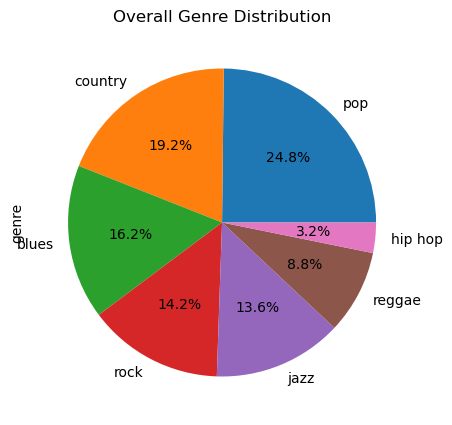

In [24]:
# Count genre occurrences
genre_counts = data['genre'].value_counts()

# Plot the data
genre_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5))
plt.title('Overall Genre Distribution')
plt.show()


## **Frequency of all unique topics in the dataset**

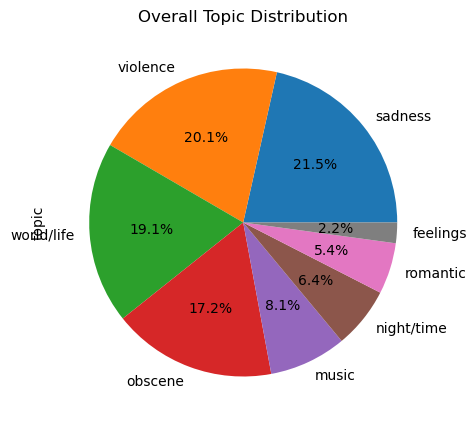

In [25]:
# Count topic occurrences
topic_counts = data['topic'].value_counts()

# Plot the data
topic_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5))
plt.title('Overall Topic Distribution')
plt.show()


## Summary EDA:

To identify most frequent words in the dataset we have generated wordcloud of all lyrics. The first figure shows wordcloud of of most frequent words. 


We have explored the dataset attributes and features and plot visualizations to get deep understanding of dataset that will support to select optimal features and build classification models. Genre attribute have 7 unique classes blues, country, hip hop, jazz, pop, reggae and rock having frequencies 4604, 5445, 904, 3845, 7042, 2498, 4034 respectively. The second depicts the percentage of all classes in genre attribute. 

 

Topic attribute have total 8 unique classes that shows that complete dataset lyrics are categorized into 8 specific topics or themes. Topic attribute classes include feelings, music, night/time, obscene, romantic, sadness, violence and word/life having frequencies 612, 2303, 1825, 4882, 1524, 6096, 5710, 5420 respectively. The last figure shows the percentage of all classes in topic attribute We have identified from both output attributes that dataset is highly imbalanced. 


After all preprocessing steps maximum length of lyric text is 1712, minimum 4 and average is 441.


### **Train-Test split**

To train and evaluate model’s performance dataset is split into two parts train and test. We randomly split data into train and test with 80:20 ratios respectively. Our predictive models will be developed using training data and will be evaluated on test set.

In [26]:
'''----------------- split_data -----------------------+
|    - split dataset into train and test with 80:20 ratio
|      input: input features (text data), output label
|      return: dataset split into train and test with input and output featues separate 
|              X_train, X_test, y_train, y_test
+-------------------------------------------'''

def split_data(input_data, output_data):
  # use train_test_split function of sklearn that will take input features and label
  # split size for test
  # generate splitted text
  X_train, X_test, y_train, y_test  = train_test_split(input_data, output_data, test_size=0.2)
  return X_train, X_test, y_train, y_test

## **Features Extraction**

### **TFidf features extraction from text**

In [27]:
'''----------------- features_extraction -----------------------+
|    - extract n_gram features from text using tfidf vectorizer
|      input: train and test data input text 
|      return: extracted n_gram word based features in range 1 to 2 and build vectorizer object
|              X_train, X_test, vectorizer
+-------------------------------------------'''

def features_extraction(X):
  # build tfidf vectorizer object
  # extract word based n_gram features
  # extracted features will have words combination of 1 to 2
  # setting max_features = 10000 will extract only 10000 features having highest probability
  # min_df = 3 it will ignore all tokens that belongs to 3 or lesser tweets
  vectorizer = TfidfVectorizer(analyzer = 'word', lowercase = False, ngram_range = (1,2), max_features = 10000, min_df=3)
  # apply vectorizer on text data
  # apply fit will extract all unique required features and build vaocabulary
  # fit function cannot be used twice as it will create redundant features
  # we need to fit vectorizer once that will build vocabulary and transorm on all new features so new features will fit in same vocabualry
  vectorizer.fit(X)
  # transform will map all string tokens to numerical features representation
  # extract features from text data
  X = vectorizer.transform(X)
  # convert extracted features to array
  X = X.toarray()
  # return extracted features for text data and vectorizer object
  return X




### **Label encode output attribute**

In [28]:
# labels are in string format whereas machine learning models can work only with numerical data
# to convert label values negative and positive into numerical representation we have used sklearn label encoder
# build label encoder object

def label_encode(label):
    le = preprocessing.LabelEncoder()
    # apply label encoder on dataset labels fit will extract all unique classes
    le.fit(label)
    # transform will map string values to numerics
    return le.transform(label), le

### **Train and Evaluate Machine Learning Models**

In [29]:
'''----------------- train_test_ml_models -----------------------+
|    - train machine learning model on train data
|    - apply trained model on input test data features to generate predictions 
|      input: model object, input train data: X_train, input test data: X_test, train data labels: y_train
|      return: model predictions
+-------------------------------------------'''

def train_test_ml_models(model, X_train, X_test, y_train):
  # train model on train dataset
  model = model.fit(X_train, y_train)
  # apply trained model on test data and generate predictions
  y_pred = model.predict(X_test)
  # return model generated predictions
  return y_pred

In [30]:
from sklearn.ensemble import RandomForestClassifier
# build a dictionary of multiple machine learning models with model names as keys and create model objects as values
models_list = {"LogisticRegression": LogisticRegression(), "MultinomialNB": MultinomialNB(), "RandomForestClassifier": RandomForestClassifier()}

### **Evaluation Metrics**

In [31]:
'''----------------- model_evaluation -----------------------+
|    - define evaluation metrics for all models
|    - Accuracy, Precision, Recall, F1 and Confusion Matrix
|    - All evaluation metrics are build from sklearn
|      input: trained model, test data labels: y_test, test data predictions generated b model: y_pred
|      display: model results on test data using defined evaluation metrics
|               plot confusion matrix results
+-------------------------------------------'''

def model_evaluation(model, y_test, y_pred, le, x_size, y_size):  
  # evaluate accuracy score
  accuracy = accuracy_score(y_test, y_pred)
  # evaluate recall score
  recall = recall_score(y_test, y_pred, average = "weighted")
  # evaluate precision score
  precision = precision_score(y_test, y_pred, average = "weighted")
  # evaluate f1 score
  f1 = f1_score(y_test, y_pred, average = "weighted")
  # evaluate confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  print("\n")
  # define plot / figure size
  plt.figure(figsize=(x_size, y_size))
  # plot confusion matrix using seaborn library heatmap 
  sns.set(font_scale=0.8)
  sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
  
  
  plt.show()
  print("=============================\n")
  print("Accuracy: ", accuracy)
  print("Recall_score: ", recall)
  print("Precision_score: ", precision)
  print("F1_score: ", f1)


## **Results and Analysis**

This project employed three distinct machine learning algorithms: Logistic Regression, Naïve Bayes, and Random Forest, to evaluate their efficacy in genre and topic classification. Through rigorous analysis, the performance of each model was ascertained based on four evaluation metrics: Accuracy, Recall, Precision, and F1-Score. Subsequently, we will undertake a comprehensive dissection of the outcomes corresponding to each research question. This rigorous analysis will elucidate the specific findings and implications associated with each question, thereby providing a holistic understanding of the multifaceted results yielded by this study.

### **RQ 1: How accurately can machine learning models classify songs based on their lyrics and topics**

#### **Combine lyrics and topic attributes**

In [35]:
data['lyrics_topics'] = data['text']+" "+data['topic']

### **Using the above build functions train and evaluate models**

#### **Label encode output attribute**

In [38]:
data['en_genre'], le = label_encode(data['genre'])

#### **Features extraction**

In [39]:
# using features_extraction function extract text input n_gram features
X = features_extraction(data['lyrics_topics'])

#### **Oversampling**

In [40]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, data['en_genre'])

#### **Train-test split**

In [41]:
# using split_data function split text dataset into train and test
X_train, X_test, y_train, y_test = split_data(X, y)



LogisticRegression Model Results:





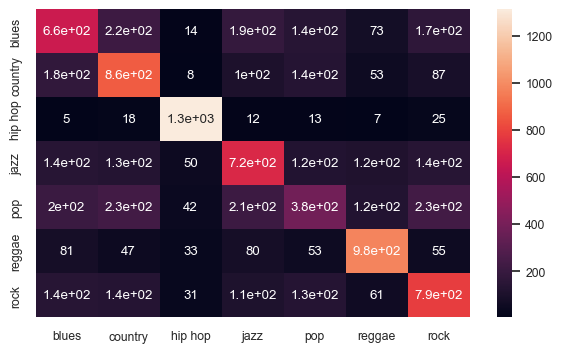


Accuracy:  0.5789633837103154
Recall_score:  0.5789633837103154
Precision_score:  0.5675852873990103
F1_score:  0.5709006936164093


MultinomialNB Model Results:





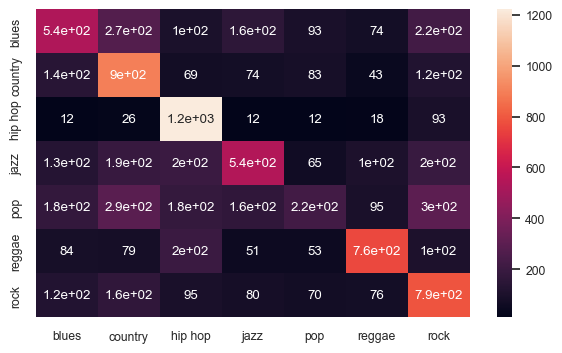


Accuracy:  0.50390506136525
Recall_score:  0.50390506136525
Precision_score:  0.49232595009889474
F1_score:  0.48275215555565376


RandomForestClassifier Model Results:





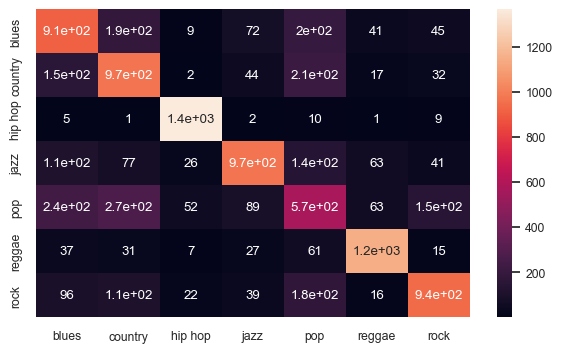


Accuracy:  0.696622375494472
Recall_score:  0.696622375494472
Precision_score:  0.698157575956282
F1_score:  0.6958139161949725


In [42]:
#375 s
x_size = 7
y_size = 4
# iterate over model dictionary
for name, model in models_list.items():
  print("\n")
  print(name, "Model Results:")
  print("================================\n")
  # call train_test_ml_models function
  # to train model and generate predictions on test data
  y_pred = train_test_ml_models(model, X_train, X_test, y_train)
  # call function model_evaluation to evaluate models performance
  model_evaluation(model, y_test, y_pred, le, x_size, y_size)


To address this research question, we have combined the lyrics and predefined topics attributes after extracting features from both attributes we pass the features to machine learning models. Among the algorithms analyzed, Random Forest emerged as the most proficient model, achieving an accuracy of 71.09%, a recall of 71.09%, a precision of 71.32%, and an F1-Score of 70.98%. In contrast, Logistic Regression demonstrated moderate performance with an accuracy of 58.81%, and Naïve Bayes was the least effective with an accuracy of 51.35%. These findings offer valuable insights into the capabilities and limitations of different machine learning algorithms for the prediction of genre based on lyrics and topics.

### **RQ 2: How do lyrical topics vary across different genres?**

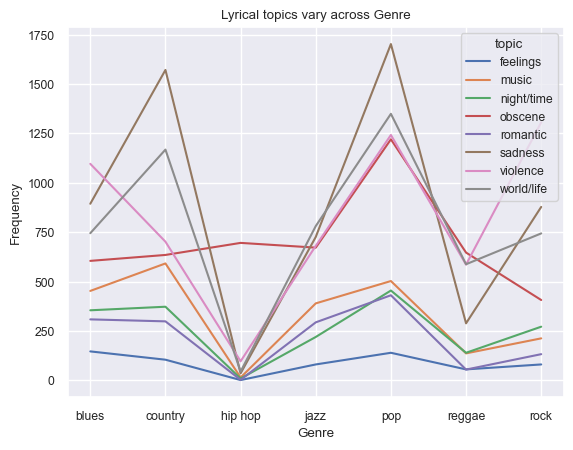

In [43]:
# Create a cross tabulation of the number of each topic per year
cross_tab = pd.crosstab(data['genre'], data['topic'])

# Plot
cross_tab.plot(kind='line')
plt.title('Lyrical topics vary across Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

## **RQ 5: How accurately can a song's genre be predicted based on its lyrics alone, as compared to using lyrics in combination with topics?**

### **Keep lyrics only as input**

In [48]:
data['lyrics'] = data['text']

## **Using the above build functions train and evaluate models**

### **Label encode output attribute**

In [49]:
data['en_genre'], le = label_encode(data['genre'])

### **Features extraction**

In [50]:
# using features_extraction function extract text input n_gram features
X = features_extraction(data['lyrics'])

### **Oversampling**

In [51]:
#74s
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, data['en_genre'])

In [52]:
y.shape

(49294,)

### **Train-test split**

In [53]:
# using split_data function split text dataset into train and test
X_train, X_test, y_train, y_test = split_data(X, y)



LogisticRegression Model Results:





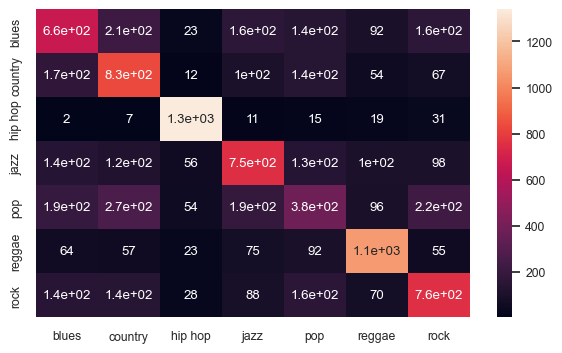


Accuracy:  0.5862663556141596
Recall_score:  0.5862663556141596
Precision_score:  0.5753476271818456
F1_score:  0.5791101873801322


MultinomialNB Model Results:





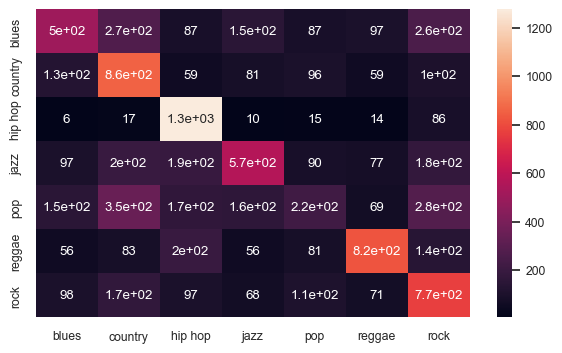


Accuracy:  0.5082665584744903
Recall_score:  0.5082665584744903
Precision_score:  0.49838210831280855
F1_score:  0.489132620912843


RandomForestClassifier Model Results:





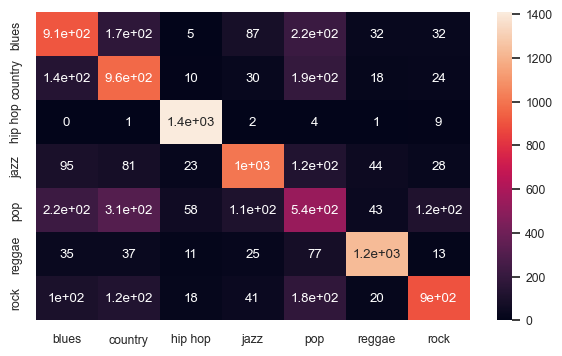


Accuracy:  0.7044324982249721
Recall_score:  0.7044324982249721
Precision_score:  0.7087110192211517
F1_score:  0.7041566665617305


In [54]:
#470s
x_size = 7
y_size = 4
# iterate over model dictionary
for name, model in models_list.items():
  print("\n")
  print(name, "Model Results:")
  print("================================\n")
  # call train_test_ml_models function
  # to train model and generate predictions on test data
  y_pred = train_test_ml_models(model, X_train, X_test, y_train)
  # call function model_evaluation to evaluate models performance
  model_evaluation(model, y_test, y_pred, le, x_size, y_size)


# **Topic Modeling**

In [55]:
# Join the different processed texts together.
long_string = ','.join(list(data['text'].values))

# Compute the frequency distribution of the words
freq_dist = nltk.FreqDist(long_string.split())

# Print the top 20 most frequent words
top_words = freq_dist.most_common(20)
print("Top 20 most frequent words count")
print("================================\n")
for word, frequency in top_words:
    print(f"{word}: {frequency}")

Top 20 most frequent words count

know: 32595
like: 29218
go: 26625
time: 25583
come: 22893
heart: 17539
feel: 17452
away: 16119
yeah: 15896
life: 15407
to: 14588
cause: 14166
want: 13875
baby: 13188
night: 12778
right: 12629
leave: 12433
live: 12430
tell: 11635
good: 11583


## **RQ 6: What are the dominant themes in song lyrics over the entire dataset?**

In [56]:
# Split the text into individual words
data['topic_model_text'] = data['text'].str.split(" ")

# **Features Extraction**

This code snippet processes a given dataset and creates a Bag of Words (BOW) representation of the corpus. 
- Here's a detailed explanation of the code:
    - **Extract texts:** Extract the 'text' column from the data DataFrame and assign it to the variable texts.
    - **Create dictionary:** Initialize a Gensim Dictionary object using the texts. The dictionary maps tokens (words) to unique integer IDs.
    - **Filter tokens:** Use the filter_extremes method to remove tokens that appear in less than three documents (no_below=3). This helps to filter out rare and potentially uninformative tokens.
    - **Create Bag of Words (BOW) representation:** Iterate through the texts and convert each document to a BOW representation using the doc2bow method of the dictionary object. The BOW representation is a list of tuples, where each tuple contains a token's unique ID and its frequency in the document. Store the BOW representations in a list called corpus_bow.
This code processes a dataset containing text data, creates a Gensim dictionary, filters out rare tokens, and constructs a Bag of Words representation of the corpus, which can then be used as input for various text analysis techniques, such as topic modeling.

In [57]:
from gensim.models import Phrases
# Create a dictionary from the list of words
texts = data['topic_model_text']

texts = [doc for doc in texts]
dictionary = corpora.Dictionary(texts)
# filter tokens below frequency of 20 words
dictionary.filter_extremes(no_below=20)
# Create a Bag of Words (BOW) representation of the corpus
corpus_bow = [dictionary.doc2bow(text) for text in texts]

In [58]:
#  Count the number of unique tokens in the dictionary
len(dictionary)

4561

## LDA Model Hyperparameter Tuning

- This code defines a function named **lda_coherence_values** that takes three input arguments: **corpus**, **dictionary**, and **k**. The function calculates the coherence score of a Latent Dirichlet Allocation (LDA) topic model for a given set of hyperparameters.

- Here's a detailed explanation of the code:

#### **Function definition:** 
- The function lda_coherence_values is defined with three input parameters: **corpus, dictionary, and k**.

    - **corpus:** A collection of text documents represented as bag-of-words (BoW) vectors.
    - **dictionary:** A mapping between words and their integer IDs.
    - **k:** The number of topics for the LDA model.
    - **a:** alpha is a parameter that controls the prior distribution over topic weights in each document
    - **b:** eta is a parameter for the prior distribution over word weights in each topic

#### **Create an LDA model:** 
- The LDA model is created using the gensim.models.LdaMulticore class.

    - **corpus=corpus:** The BoW vectors representing the text documents.
    - **id2word=dictionary:** The dictionary containing the mapping between words and their integer IDs.
    - **num_topics=k:** The number of topics for the LDA model.
    - **random_state=100:** A seed value for reproducibility.
    - **chunksize=100:** The number of documents to process at once in the LDA algorithm.
    - **passes=10:** The number of passes through the entire corpus during training.
    - **minimum_probability=10:** Topics with a probability lower than this threshold will be filtered out.
    - **a:** alpha is a parameter that controls the prior distribution over topic weights in each document
    - **b:** eta is a parameter for the prior distribution over word weights in each topic

#### **Calculate the coherence score:**
- The coherence score is calculated using the CoherenceModel class from the gensim.models.coherencemodel module.

    - **model=lda_model:** The trained LDA model.
    - **texts=texts:** The original text documents (not provided in the function but should be available in the same scope where the function is being called).
    - **dictionary=dictionary:** The dictionary containing the mapping between words and their integer IDs.
    - **coherence='c_v':** The coherence measure to use (in this case, 'c_v' or the C_v measure).


    - **corpus:** The BoW vectors representing the text documents.

#### **Return values:**
- The function returns the coherence score.

    - **coherence_model_lda.get_coherence():** The coherence score of the LDA model.
    
In summary, this function takes a corpus, dictionary, and the number of topics as input arguments, and it calculates the coherence score ikelihood of the corresponding LDA topic model. The LDA model is created using the Gensim library, and the coherence score is calculated using the C_v coherence measure.

In [59]:
# supporting function
# Define a function to calculate the coherence score for a given set of hyperparameters
def lda_coherence_values(corpus, dictionary, k):
    # Create an LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           minimum_probability=5)
    # Calculate the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    
    
    
    return coherence_model_lda.get_coherence()

This code snippet performs hyperparameter tuning for the LDA topic model to find the optimal number of topics within a given range. It runs the lda_coherence_values function for each number of topics in the specified range and stores the coherence scores in a dictionary. The results are then saved to a CSV file.

- Here's a detailed explanation of the code:

    - **Topics range:** Define the minimum and maximum number of topics and the step size for the range of topics to consider.
    - **Store the results:** Create a dictionary to store the results of the hyperparameter tuning.
    - **Progress bar:** Initialize a progress bar using the tqdm library to provide a visual indication of the progress during the tuning process.
    - **Iterate through the number of topics:** Loop through each number of topics in the defined range.
    - **Calculate the coherence score:** Call the lda_coherence_values function for each number of topics and get the coherence score.
    - **Save the results:** Append the number of topics, coherence score to the lda_model_result dictionary.
    - **Update the progress bar:** Increment the progress bar by 1 to indicate the completion of one iteration.
    - **Save the results to a CSV file:** After the loop is completed, convert the lda_model_result dictionary to a pandas DataFrame and save it as a CSV file.
    - **Close the progress bar:** Close the progress bar once the hyperparameter tuning is complete.
This code performs hyperparameter tuning for the LDA topic model by iteratively running the lda_coherence_values function for different numbers of topics, and it saves the coherence scores to a CSV file.

In [60]:
# Topics range
min_topics = 5
max_topics = 30
step_size = 1
# Define the range of topics to consider
topics_range = range(min_topics, max_topics, step_size)



# Store the results of the hyperparameter tuning in a dictionary
lda_model_results = {'Topics': [],
                 'Coherence': []
                }
# Can take a long time to run
# Perform hyperparameter tuning using nested loops
if 1 == 1:
    pbar = tqdm.tqdm(total=30)
    # iterate through number of topics
    for k in topics_range:
                # get the coherence score for the given parameters
                cv = lda_coherence_values(corpus=corpus_bow, dictionary=dictionary, 
                                                  k=k)
                # Save the model results
                lda_model_results['Topics'].append(k)
                lda_model_results['Coherence'].append(cv)
                    
                pbar.update(1)
    pd.DataFrame(lda_model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

 83%|████████▎ | 25/30 [2:19:45<27:57, 335.42s/it]  


In [ ]:
#4530 s

In [61]:
# Creates a pandas DataFrame from the results of an LDA model.
result = pd.DataFrame(lda_model_results)
result

,Topics,Coherence
0,5,0.411766
1,6,0.412849
2,7,0.392634
3,8,0.382241
4,9,0.392446
5,10,0.386106
6,11,0.391641
7,12,0.370505
8,13,0.394118
9,14,0.355395


In [63]:
# Returns a row of the DataFrame results where the Coherence column has the maximum value.
result.loc[result['Coherence'] == result['Coherence'].max()]

,Topics,Coherence
1,6,0.412849


In [64]:
result.nlargest(5, 'Coherence')

,Topics,Coherence
1,6,0.412849
0,5,0.411766
8,13,0.394118
2,7,0.392634
4,9,0.392446


### **Plot results**
- **Plots a line graph of the Topics and Coherence columns from the results DataFrame.**
- **Adds labels to the graph for the title, x-axis, y-axis, and legend.**
- **Displays the graph.**

In [65]:
plot_coherence = result.loc[result.groupby('Topics')['Coherence'].idxmax()]

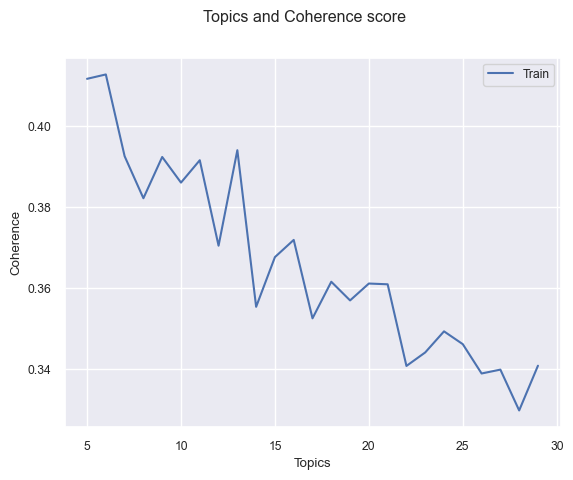

In [66]:
plt.plot(result['Topics'], result['Coherence'], label='Train')
plt.suptitle('Topics and Coherence score')
plt.xlabel('Topics')
plt.ylabel('Coherence')
plt.legend()
plt.show()

## Train LDA model with best parameters
- **Train an LDA model on the corpus_tfidf using the LdaMulticore class from the gensim library.**
    - **Sets the number of topics to 6**
    - **the random seed to 100**
    - **the chunk size to 100**
    - **the number of passes to 10**
    - **and other parameters for the model.**

In [67]:
# Define all LDA parameters and create an LDA model
lda_model = models.LdaMulticore(corpus=corpus_bow,
                                id2word=dictionary,
                                num_topics=7,  # The number of topics to be extracted
                                random_state=100,  # Sets the random state for reproducibility
                                chunksize=100,  # Number of documents to be used in each training chunk
                                passes=10,  # Number of passes through the corpus during training
                                alpha=0.01,
                                eta=0.01,
                                minimum_probability=5)  # Sets the minimum probability threshold for topics

# Applies the trained LDA model to the corpus_tfidf and returns a list of tuples containing 
# topic probabilities for each document in the corpus
corpus_lda = lda_model[corpus_bow]


In [ ]:
#68s

In [68]:
# Creates a CoherenceModel object from the gensim library with the 'c_v' coherence metric.
# Calculates the coherence score for the LDA model using the get_coherence() method of the CoherenceModel object.

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
print("Coherence Score: ", coherence_model_lda.get_coherence())

Coherence Score:  0.38098722918236616


This code snippet extracts the top keywords from an LDA model and prints the topic numbers and keywords without their probability values. It also stores the keywords in a list.

- Here's a detailed explanation of the code:

 - **Initialize lists:** Create two empty lists, keywords and tr, to store the extracted keywords and their associated probabilities.
 - **Iterate through topics:** Loop through the topics generated by the LDA model using the print_topics method. The -1 argument indicates that all topics should be printed, and the num_words=10 argument specifies the top 10 keywords for each topic.
 - **Extract probabilities:** Define a regex pattern to match the probabilities associated with each keyword in the topic string. The pattern captures the probability value followed by a space and an asterisk (e.g., 0.123*).
 - **Find matches:** Use the re.findall function to find all matches of the regex pattern in the topic string.
 - **Store probabilities:** Append the probability values (as floats) to the tr list.
 - **Extract keywords:** Use the re.findall function with a regex pattern to extract only the alphabetical characters (i.e., the keywords) from the topic string.
 - **Print topic and keywords:** Print the topic number (idx) and the extracted keywords (key_words_only).
 - **Append keywords:** Add the extracted keywords to the keywords list.

This code iterates through the topics generated by the LDA model, extracts the top keywords and their probabilities, and prints the topic numbers along with the extracted keywords. It stores the keywords in the keywords list and the probabilities in the tr list.

In [69]:
keywords = {}

for idx, topic in lda_model.print_topics(-1, num_words=50):
    #print out topic numbers and keywords.
#    print('Topic: {} Word: {}'.format(idx, topic))
    pattern =r'"([A-Za-z0-9_\./\\-]*)"'
    
    matches = re.findall(pattern, topic)
    keyword = [i for i in matches]
    
   
    print ('Topic',idx,": ", ", ".join(keyword))
    print("\n")
    keywords[idx] = " ".join(keyword)


Topic 0 :  life, live, world, come, believe, know, stand, change, dream, thing, time, people, need, day, fear, give, alive, year, look, like, soul, place, open, grow, lose, forever, eye, hand, free, learn, feel, light, strong, face, true, begin, rest, think, breathe, save, earth, today, child, reason, promise, peace, want, remember, word, trust


Topic 1 :  like, know, fuck, yeah, cause, shit, bitch, money, wanna, nigga, want, come, tell, niggas, think, real, time, girl, need, good, look, party, right, bout, talk, play, stop, get, game, baby, thing, ready, check, feel, smoke, hard, start, damn, everybody, drop, beat, high, kick, well, people, comin, roll, work, drink, little


Topic 2 :  sing, hear, song, home, come, blue, play, music, bring, sound, call, remember, word, summer, dance, write, ring, wind, sweet, blow, listen, long, like, roll, night, day, radio, voice, go, rain, river, band, tune, swing, moon, drown, christmas, soon, say, winter, letter, ohoh, little, guitar, tree, know

# **Visualize Topics**

## **WordCloud**
This code snippet visualizes the topics generated by an LDA model using word clouds. Here's a brief explanation of the code in five steps:

- **Extract topics:** Retrieve the top 50 words for each topic using the show_topics method of the lda_model object.
- **Determine subplot grid:** Calculate the number of subplots required based on the number of topics (odd or even) and create a grid for the subplots.
- **Prepare subplot axes:** Depending on whether the number of topics is odd or even, adjust the axes to be plotted accordingly.
- **Generate word clouds:** Iterate through the topics, create word clouds using the WordCloud class, and display them in the subplots.
- **Customize and show plot:** Adjust subplot properties (spacing, axis visibility) and display the final word cloud visualization.

This code creates a word cloud visualization of the topics generated by the LDA model, allowing for a better understanding of the most prominent words in each topic.

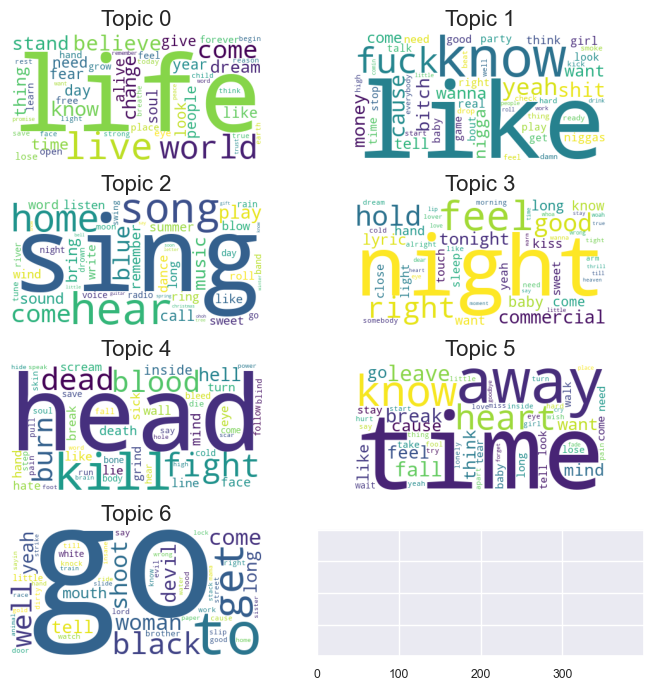

In [70]:
from wordcloud import WordCloud
# find number of topics
topics = lda_model.show_topics(formatted=False,num_words = 50)

# for odd number of topics
if len(topics)%2 == 1:
    sub_plts = int(len(topics)/2)
    sub_plts = sub_plts+1
# for even number of topics   
else: 
    sub_plts = int(len(topics)/2)


fig, axes = plt.subplots(sub_plts, 2, figsize=(7,7), sharex=True, sharey=True)

# for odd number of topics
if len(topics)%2 == 1:
    axes_p = axes.flatten()[:-1]
# for even number of topics
else:
    axes_p = axes.flatten()
    
# iterate over topics
for i, ax in enumerate(axes_p):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    # generate wordcloud
    cloud = WordCloud(background_color='white')
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
#plt.pad=0
plt.show()

- **This code block starts by creating an empty list called list_of_dict.**

- **The next line gets the topic distribution of the documents in the corpus using the get_document_topics() function of the LDA model.**

- **The code then loops over each document's topic distribution, sorts the topics by probability in descending order using the sorted() function, and creates an empty dictionary called my_dict.**

- **The inner loop then iterates over the sorted topics, and for the topic with the highest probability (i.e., the dominant topic), it adds the topic number and probability to my_dict.**

- **Finally, the my_dict is appended to list_of_dict, and this process is repeated for each document in the corpus.**

In [71]:
# Find the dominant topic in each document
list_of_dict = []

# Get the document topics for each document in the corpus_tfidf and set minimum_probability to 0.0
doc_topics = lda_model.get_document_topics(corpus_bow, minimum_probability=0.0)
print('document topics: ', doc_topics)

# Iterate through the document topics
for each_doc in doc_topics:
    # Sort the topics in descending order of probability
    topics = sorted(each_doc, key=lambda x: x[1], reverse=True)

    # Initialize an empty dictionary to store topic information
    my_dict = {}

    # Iterate through the sorted topics and their probabilities
    for top, (topic_num, topic_prob) in enumerate(topics):
        if top == 0:  # The first item in the list represents the most dominant topic
            my_dict["1st dominant topic"] = topic_num
            my_dict['probability 1'] = topic_prob
            my_dict['topic_keywords'] = keywords[topic_num]  # Get the keywords for the dominant topic

    # Append the dictionary containing topic information to the list_of_dict
    list_of_dict.append(my_dict)


document topics:  <gensim.interfaces.TransformedCorpus object at 0x000001D39F7DA9B0>


In [72]:
topics_data = pd.DataFrame(list_of_dict)
topics_data.head(1)

,1st dominant topic,probability 1,topic_keywords
0,5,0.67671,time away know heart leave fall break feel wan...


In [74]:
# Assuming 'topics_data' is your DataFrame and 'dominant_topic' is the column with topic numbers
topic_names = ['music', 'obscene', 'romantic', 'violence', 'sadness', 'world/life', 'night/time']

# Create a dictionary where keys are topic numbers and values are topic names
topic_dict = {i: name for i, name in enumerate(topic_names)}

# Replace the numbers with names
topics_data['model_topics'] = topics_data['1st dominant topic'].replace(topic_dict)
topics_data.head(5)

,1st dominant topic,probability 1,topic_keywords,model_topics
0,5,0.676710,time away know heart leave fall break feel wan...,world/life
1,0,0.787501,life live world come believe know stand change...,music
2,5,0.391815,time away know heart leave fall break feel wan...,world/life
3,5,0.370320,time away know heart leave fall break feel wan...,world/life
4,3,0.328968,night feel right hold good commercial tonight ...,violence


In [75]:
np.unique(topics_data['model_topics'], return_counts=True)

(array(['music', 'night/time', 'obscene', 'romantic', 'sadness',
        'violence', 'world/life'], dtype=object),
 array([5922, 1355, 5467, 2251, 2447, 1891, 9039], dtype=int64))

In [76]:
dataset = pd.concat([data, topics_data[["topic_keywords", 'model_topics']]], axis=1)
#dataset.to_excel("topics_data.xlsx")
dataset.head(5)

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,energy,topic,age,text,word_len,lyrics_topics,en_genre,topic_model_text,topic_keywords,model_topics
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.137110,sadness,1.0,hold time feel break feel untrue convince spea...,522,hold time feel break feel untrue convince spea...,4,"[hold, time, feel, break, feel, untrue, convin...",time away know heart leave fall break feel wan...,world/life
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.263240,world/life,1.0,believe drop rain fall grow believe darkest ni...,313,believe drop rain fall grow believe darkest ni...,4,"[believe, drop, rain, fall, grow, believe, dar...",life live world come believe know stand change...,music
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel wel...,24,0.002770,0.002770,0.002770,0.002770,...,0.139112,music,1.0,sweetheart send letter goodbye secret feel wel...,149,sweetheart send letter goodbye secret feel wel...,4,"[sweetheart, send, letter, goodbye, secret, fe...",time away know heart leave fall break feel wan...,world/life
3,pérez prado,patricia,1950,pop,kiss lip want stroll charm mambo chacha mering...,54,0.048249,0.001548,0.001548,0.001548,...,0.743736,romantic,1.0,kiss lip want stroll charm mambo chacha mering...,312,kiss lip want stroll charm mambo chacha mering...,4,"[kiss, lip, want, stroll, charm, mambo, chacha...",time away know heart leave fall break feel wan...,world/life
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.394375,romantic,1.0,till darling till matter know till dream live ...,270,till darling till matter know till dream live ...,4,"[till, darling, till, matter, know, till, drea...",night feel right hold good commercial tonight ...,violence


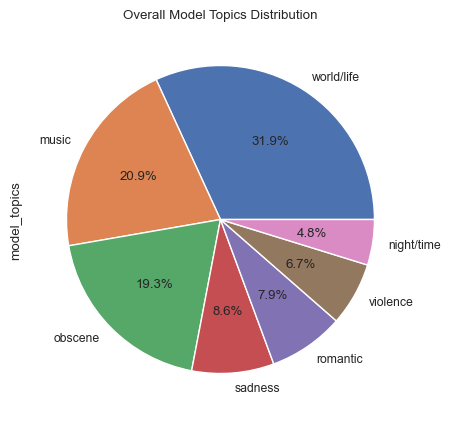

In [77]:
# Count topic occurrences
topic_counts = dataset['model_topics'].value_counts()

# Plot the data
topic_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5))
plt.title('Overall Model Topics Distribution')
plt.show()


## **RQ 7: How have topics in lyrics evolved over the years, from 1950 to 2019?**

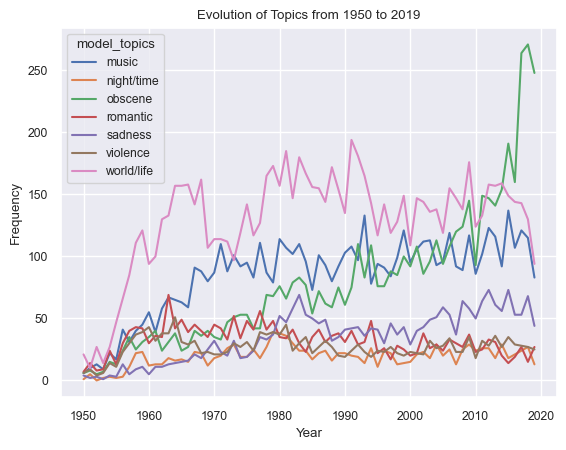

In [78]:
# Create a cross tabulation of the number of each topic per year
cross_tab = pd.crosstab(dataset['release_date'], dataset['model_topics'])

# Plot
cross_tab.plot(kind='line')
plt.title('Evolution of Topics from 1950 to 2019')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## **RQ 8: Are there distinctive topics that can be associated with different genres?**

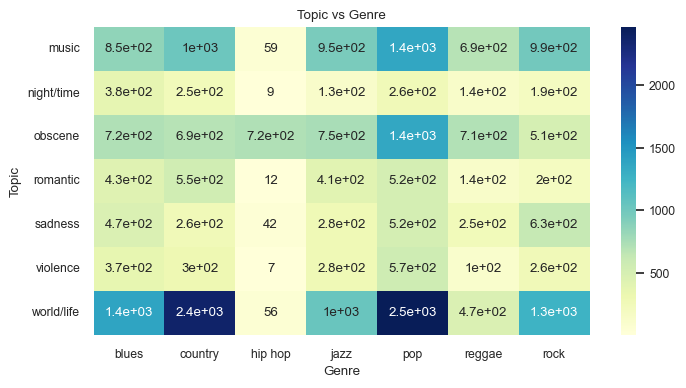

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Create a cross-tabulation table
cross_tab = pd.crosstab(dataset['model_topics'], dataset['genre'])

plt.figure(figsize=(8, 4))
sns.set(font_scale=0.8)
# Plotting a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('Topic vs Genre')
plt.xlabel('Genre')
plt.ylabel('Topic')
plt.show()


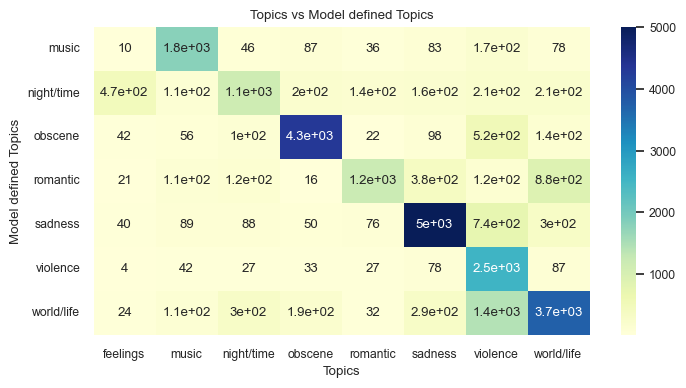

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Create a cross-tabulation table
cross_tab = pd.crosstab(dataset['model_topics'], dataset['topic'])

plt.figure(figsize=(8, 4))
sns.set(font_scale=0.8)
# Plotting a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('Topics vs Model defined Topics')
plt.xlabel('Topics')
plt.ylabel('Model defined Topics')
plt.show()


## **RQ 11: Can topic modeling keywords help improve the accuracy of genre prediction models when combined with the lyrics and predifined topics?**